In [68]:
import pandas as pd
import pandas as pd
import requests
import json
import functools
import sqlite3
import pprint as pp

In [ ]:
eia_api_url= 'http://api.eia.gov/series/?api_key=651b30b69f4f47a13a2912d673f7da93&series_id='

series_pulled = {
    'Weekly Stocks':'PET.WTTSTUS1.W',
    'Spot Price':'PET.RWTC.D',
    'Crude Supplied':'PET.WRPUPUS2.W'
}

def pull_series(name,id):
    
    # Get data from API
    
    
    
    # Convert API Data to Dataframe, set index as date
    series_frame = pd.DataFrame(series_list)
    series_frame.columns=['Month',name]
    series_frame['Date']=pd.to_datetime(series_frame['Date'])
    series_frame.set_index('Date',drop=True,inplace=True)
    series_frame.sort_index(ascending=True,inplace=True)

    return series_frame


In [111]:
class EIA_Series:
    
    eia_api_url= 'http://api.eia.gov/series/?api_key=651b30b69f4f47a13a2912d673f7da93&series_id='
    
    
    def __init__(
        self,
        name,
        id,
        desc = None
    ):
        self.name = name
        self.id = id
        self.desc = desc
        
        self.request = requests.get(eia_api_url+self.id)
        self.series_dict = json.loads(self.request.text)
        
    def show_response(self):
        
        pp.pprint(self.series_dict)
          
        
    def make_df(self,format='%Y%m%d',data_col='data',date_col='Date'):
        
        self.data_col = data_col
        self.date_col = date_col
        
        self.series_list=self.series_dict['series'][0][data_col]
        self.series_frame = pd.DataFrame(self.series_list)
        self.series_frame.columns=[self.date_col,self.name]
        
        
        
        self.series_frame[self.date_col]=pd.to_datetime(
            self.series_frame[self.date_col],
            format=(format)
        )
        
        self.series_frame.set_index(
            self.date_col,drop=True,inplace=True)
            
        self.series_frame.sort_index(ascending=True,inplace=True)
    
    def chart(self):
        self.series_frame.plot()
        
    def report(self):
        print(
        "Earliest Point: {} \n".format(self.data.iloc[0].name),
        "Latest Point: {} \n".format(self.data.iloc[-1].name),
        ""
        )


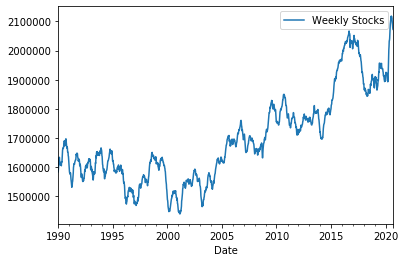

In [112]:
desc = ''

weekly_stocks = EIA_Series('Weekly Stocks','PET.WTTSTUS1.W')
weekly_stocks.make_df()
weekly_stocks.chart()

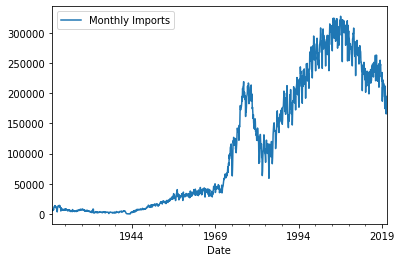

In [115]:
desc = 'US imports of crude oil, monthly'

monthly_imports = EIA_Series('Monthly Imports','PET.MCRIMUS1.M',desc )
monthly_imports.make_df('%Y%m')
monthly_imports.chart()

In [114]:
monthly_imports.series_list[-1]

['192001', 6294]

In [ ]:
\
df_eia=functools.reduce(lambda x,y: x.join(y,how='outer'),frame_list)
df_eia.fillna(axis=0,method='ffill',inplace=True)

conn = sqlite3.connect('oilstocks.db')
c = conn.cursor()

for col in df_eia:
    df_eia[col]=preprocessing.scale(df_eia[col])

df_eia.to_sql("scaledstocks",conn,if_exists='replace')
conn.commit()

df_eia.to_sql("crudestocks",conn,if_exists='replace')